In [2]:
import json

# Load your enriched dataset
with open("bloomberght_articles_enriched_xpath.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Filter and measure article_body lengths (in words)
lengths = [
    len(entry["article_body"].split())
    for entry in data
    if entry.get("article_body") and entry["article_body"].strip()
]

print(f"✅ Total articles with non-empty article_body: {len(lengths)}")
print(f"🔢 Min length: {min(lengths)} words")
print(f"🔢 Max length: {max(lengths)} words")
print(f"📊 Average length: {sum(lengths) / len(lengths):.2f} words")


✅ Total articles with non-empty article_body: 324991
🔢 Min length: 1 words
🔢 Max length: 13392 words
📊 Average length: 251.47 words


C:\Users\oktem\AppData\Local\Temp\ipykernel_20868\1480838763.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\oktem\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


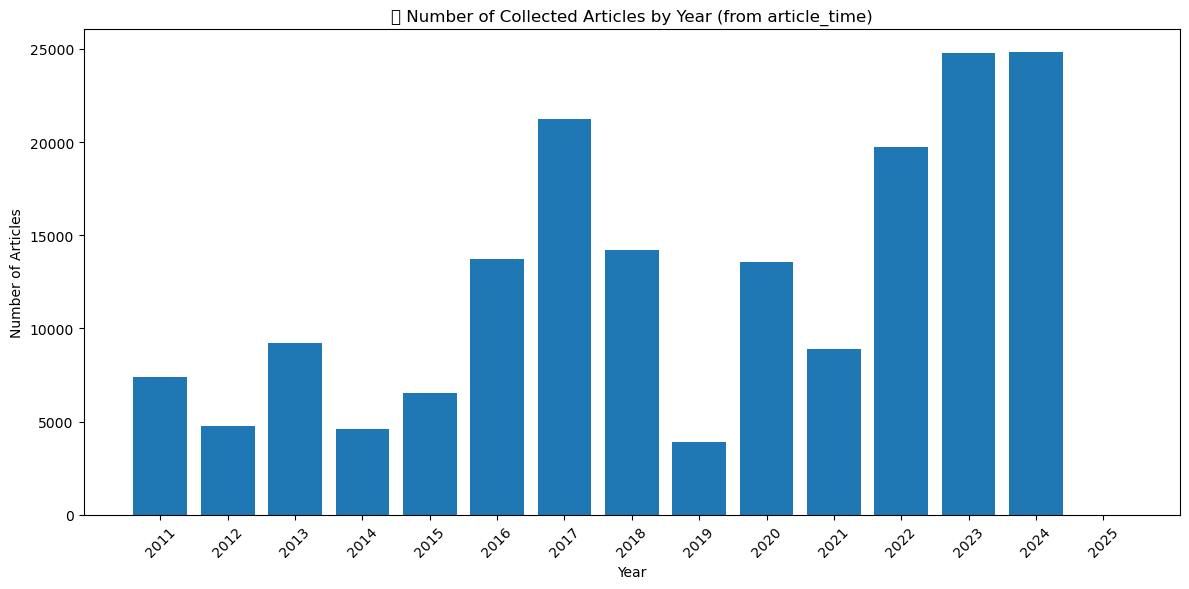

In [3]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load enriched articles
with open("bloomberght_articles_enriched_xpath.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract year from article_time or timestamp
years = []
for entry in data:
    atime = entry.get("article_time", "")
    if atime.startswith("Giriş:"):
        parts = atime.split()
        if len(parts) >= 4 and parts[3].isdigit():
            years.append(parts[3])
    elif "timestamp" in entry and entry["timestamp"][:4].isdigit():
        years.append(entry["timestamp"][:4])

# Count articles per year
year_counts = Counter(years)
sorted_years = sorted(year_counts.items())

# Plot
labels, values = zip(*sorted_years)
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("📊 Number of Collected Articles by Year (from article_time)")
plt.tight_layout()
plt.show()


## Filtering the Articles

In [10]:
import json
import re

INPUT_FILE = "bloomberght_articles_enriched_xpath.json"
OUTPUT_FILE = "china_framed_articles_with_all_texts.json"


# Keyword patterns to detect framing of China
keyword_patterns = [
    r"(?<!\w)Çin(?:['’]?[a-zA-ZçğıöşüÇĞİÖŞÜ]*)?(?!\w)",
    r"(?<!\w)Pekin(?:['’]?[a-zA-ZçğıöşüÇĞİÖŞÜ]*)?(?!\w)",
    r"(?<!\w)Huawei(?!\w)",
    r"Kuşak ve Yol",
    r"İpek Yolu",
    r"(?<!\w)Taiwan(?!\w)",
    r"(?<!\w)Tayvan(?!\w)",
    r"(?<!\w)China(?!\w)",
    r"(?<!\w)Beijing(?!\w)",
    r"Belt and Road"
]

pattern = re.compile("|".join(keyword_patterns), re.IGNORECASE)

# Load data
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Filter and enrich articles
filtered = []
for article in data:
    title = article.get("title", "")
    subarticle = article.get("subarticle", "")
    body = article.get("article_body", "")
    
    # Create 'all_texts' field
    all_texts = f"{title}\n{subarticle}\n{body}".strip()
    
    if pattern.search(all_texts):
        article["all_texts"] = all_texts
        filtered.append(article)

# Save to file
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(filtered, f, ensure_ascii=False, indent=2)

# Summary
print(f"✅ Found {len(filtered)} articles with China-related framing")
print("📰 Sample titles:")
for article in filtered[:5]:
    print("-", article.get("title", "No title"))

✅ Found 44340 articles with China-related framing
📰 Sample titles:
- 1 trilyon dolarlık şirketler kulübü
- 1 trilyon dolarlık şirketler kulübü
- 1 trilyon dolarlık şirketler kulübü
- 1 trilyon dolarlık şirketler kulübü
- 10 maddede Kovid-19 dünya ekonomisini nasıl değiştirdi?


## Removing duplicates with respect to original_url

In [12]:
import json

INPUT_FILE = "china_framed_articles_with_all_texts.json"
OUTPUT_FILE = "bloomberght_china_framed_articles_final.json"

# Load data
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Remove duplicates by original_url
unique_articles = {}
for article in data:
    url = article.get("original_url")
    if url and url not in unique_articles:
        unique_articles[url] = article

# Convert back to list
deduplicated = list(unique_articles.values())

# Save final JSON
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(deduplicated, f, ensure_ascii=False, indent=2)

print(f"✅ Final deduplicated dataset saved as '{OUTPUT_FILE}'")
print(f"📦 Total unique articles: {len(deduplicated)}")


✅ Final deduplicated dataset saved as 'bloomberght_china_framed_articles_final.json'
📦 Total unique articles: 44340


## Removing duplicates with respect to title 

In [14]:
import json

INPUT_FILE = "china_framed_articles_with_all_texts.json"
OUTPUT_FILE = "bloomberght_china_framed_articles_final.json"

# Load data
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Remove duplicates by original_url
unique_articles = {}
for article in data:
    url = article.get("title")
    if url and url not in unique_articles:
        unique_articles[url] = article

# Convert back to list
deduplicated = list(unique_articles.values())

# Save final JSON
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(deduplicated, f, ensure_ascii=False, indent=2)

print(f"✅ Final deduplicated dataset saved as '{OUTPUT_FILE}'")
print(f"📦 Total unique articles: {len(deduplicated)}")


✅ Final deduplicated dataset saved as 'bloomberght_china_framed_articles_final.json'
📦 Total unique articles: 30330


## Remvoing duplicates by title + article_time (this one is used now)

In [16]:
import json

INPUT_FILE = "china_framed_articles_with_all_texts.json"
OUTPUT_FILE = "bloomberght_china_framed_articles_final.json"

# Load data
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Remove duplicates based on title + article_time
seen = set()
unique_articles = []

for article in data:
    title = article.get("title", "").strip()
    date = article.get("article_time", "").strip()
    key = (title, date)

    if key not in seen and title and date:
        seen.add(key)
        unique_articles.append(article)

# Save the final deduplicated file
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(unique_articles, f, ensure_ascii=False, indent=2)

print(f"✅ Deduplicated by title + article_time")
print(f"📦 Final count: {len(unique_articles)} articles")
print(f"💾 Saved to: {OUTPUT_FILE}")


✅ Deduplicated by title + article_time
📦 Final count: 33253 articles
💾 Saved to: bloomberght_china_framed_articles_final.json


## Visualising by year

C:\Users\oktem\AppData\Local\Temp\ipykernel_22880\1728863236.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\oktem\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


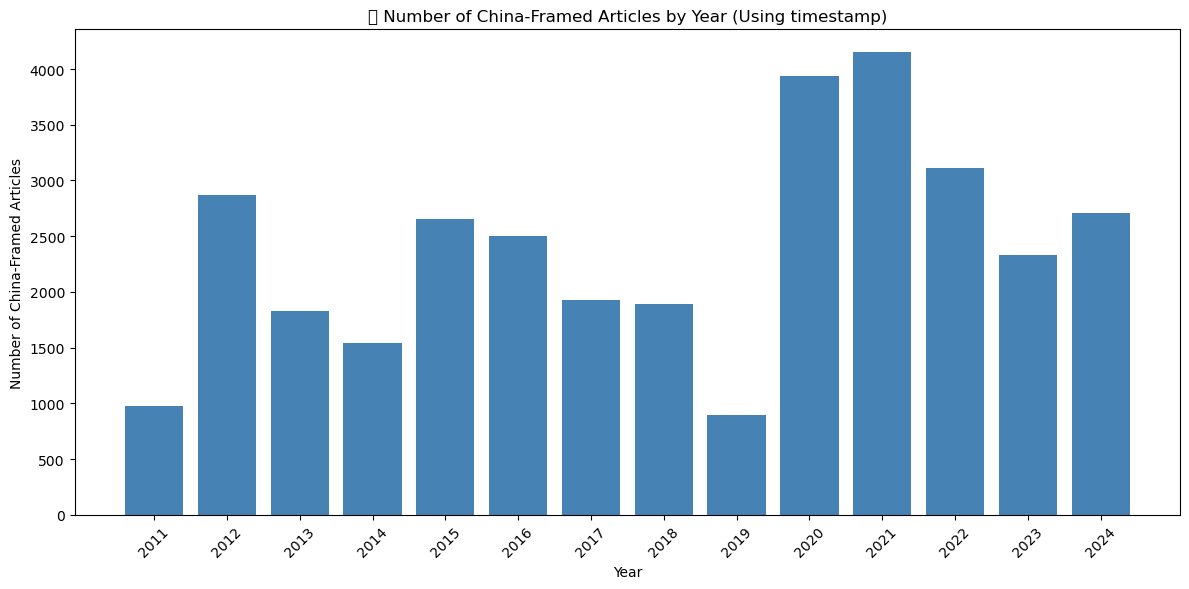

In [32]:
import json
from collections import Counter
import matplotlib.pyplot as plt

INPUT_FILE = "bloomberght_china_framed_articles_final.json"

# Load deduplicated dataset
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract year from first 4 digits of timestamp
years = [
    article["timestamp"][:4]
    for article in data
    if "timestamp" in article and article["timestamp"][:4].isdigit()
]

# Count articles per year
year_counts = Counter(years)
sorted_years = sorted(year_counts.items())

# Plotting
labels, values = zip(*sorted_years)
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color="steelblue")
plt.xlabel("Year")
plt.ylabel("Number of China-Framed Articles")
plt.title("📊 Number of China-Framed Articles by Year (Using timestamp)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
